## Fase de exploração dos dados ☕☕☕

#### O dataset foi obtido no kaggle e foi escolhido pelo fato de que apresenta-se mais robusto do que os demais encontrados. Embora o CQI(coffee quality insitute) possua dados mais atualizados acerca desse produto, não consegui encontrar esses dados, logo usarei estes, que são dados de 2018.


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from random import random, uniform, randint, choice
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [93]:
df = pd.read_csv('merged_data_cleaned.csv', index_col=0)
df_aux = df
df

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,"kwanza norte province, angola",...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [94]:
df.dtypes

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

In [95]:
def lbs_to_kgs(weight):
    if "kg" in weight:
        parts = weight.split(" ")
        return parts[0]
    if "lbs" in weight:
        parts = weight.split(" ")
        return f"{int(parts[0]) * 0.45359237:.1f}"
    return 0

def fix_NaN_values(df):
    df["altitude_low_meters"].fillna(df["altitude_low_meters"].mean(), inplace=True)
    df["altitude_high_meters"].fillna(df["altitude_high_meters"].mean(), inplace=True)
    df["altitude_mean_meters"].fillna(df["altitude_mean_meters"].mean(), inplace=True)
    df["lot_number"].fillna("N/A", inplace=True)
    df["farm_name"].fillna("N/A", inplace=True)
    df["mill"].fillna("N/A", inplace=True)
    df["owner"].fillna("N/A", inplace=True)
    df["company"].fillna("N/A", inplace=True)
    df["producer"].fillna("N/A", inplace=True)
    df["ico_number"].fillna("N/A", inplace=True)

    return df.dropna()

In [96]:
df.columns = df.columns.str.lower().str.replace(".", "_")
df_aux.columns = df.columns.str.lower().str.replace(".", "_")

In [97]:
len(df)

1339

In [98]:
df = fix_NaN_values(df)
df_aux = fix_NaN_values(df)

df['bag_weight'] = df['bag_weight'].apply(
    lambda weight: lbs_to_kgs(weight)
)

df_aux['bag_weight'] = df_aux['bag_weight'].apply(
    lambda weight: lbs_to_kgs(weight)
)

<ipython-input-95-2331cbcb7077>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["altitude_low_meters"].fillna(df["altitude_low_meters"].mean(), inplace=True)
<ipython-input-95-2331cbcb7077>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["altitude_high_meters"].fillna(df["altitude_high_meters"].mean(), inplace=True)
<ipython-input-95-2331cbcb7077>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["altitude_mean_meters"].fi

In [99]:
len(df)

850

<ipython-input-100-400e5ce5bcee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['altitude_category'] = pd.cut(filtered_df['altitude_mean_meters'], bins=bins, labels=labels)


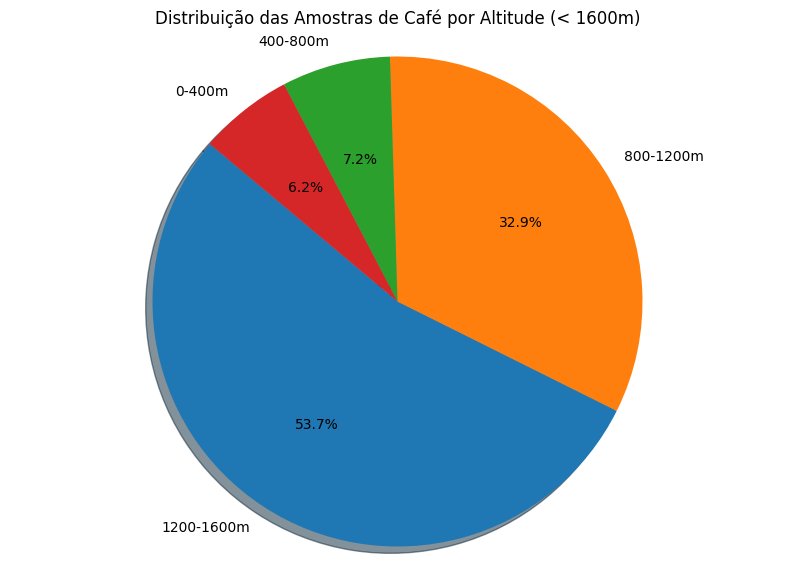

In [100]:
filtered_df = df[df["altitude_mean_meters"] < 1600]

# Criar categorias de altitude para melhor visualização
bins = [0, 400, 800, 1200, 1600]
labels = ['0-400m', '400-800m', '800-1200m', '1200-1600m']
filtered_df['altitude_category'] = pd.cut(filtered_df['altitude_mean_meters'], bins=bins, labels=labels)

# Contar as amostras em cada categoria
altitude_counts = filtered_df['altitude_category'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(10, 7))
plt.pie(altitude_counts, labels=altitude_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Distribuição das Amostras de Café por Altitude (< 1600m)")
plt.axis('equal')  # Assegura que o gráfico seja um círculo
plt.show()

<BarContainer object of 5 artists>

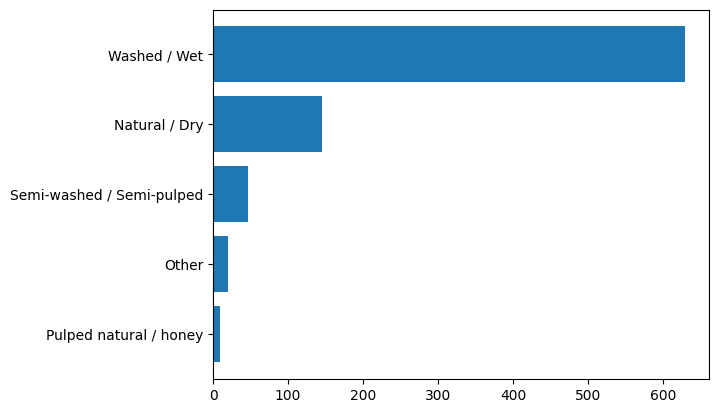

In [101]:
processing_methods = df["processing_method"].value_counts().sort_values()
plt.barh(processing_methods.index, processing_methods.values)

([<matplotlib.patches.Wedge at 0x789413e4b130>,
 [Text(-1.09993238127272, 0.012196582624810964, 'Arabica'),
  Text(1.0999323805946994, -0.012196643771027799, 'Robusta')],
 [Text(-0.5999631170578472, 0.0066526814317150705, '99.65'),
  Text(0.5999631166880178, -0.006652714784196981, '0.35')])

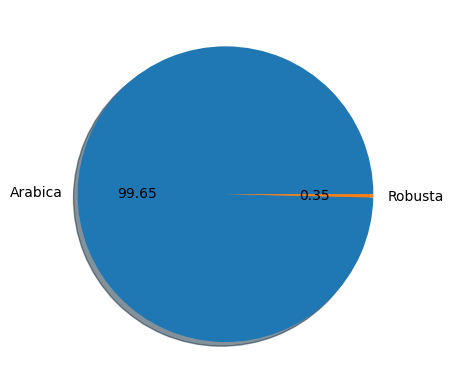

In [102]:
species = df["species"].value_counts()
plt.pie(species.values, labels=species.index, shadow=True, autopct="%.2f")

<BarContainer object of 25 artists>

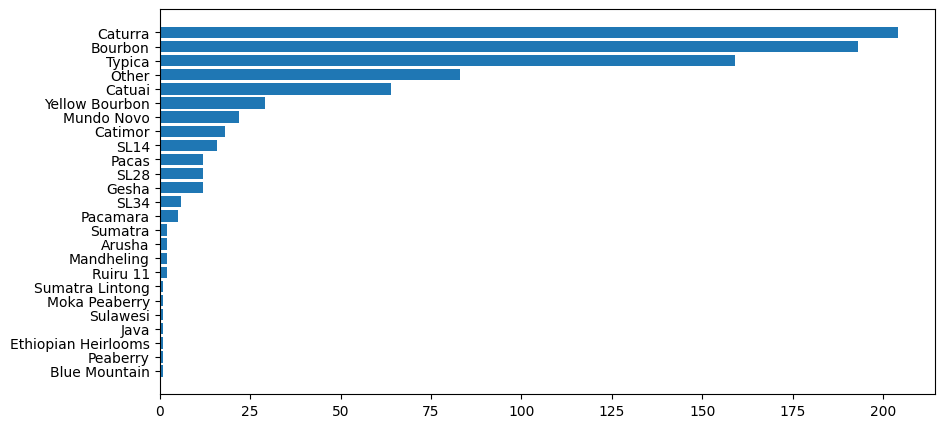

In [103]:
variety = df["variety"].value_counts().sort_values()
plt.figure(figsize=(10,5))
plt.barh(variety.index, variety.values)

<BarContainer object of 28 artists>

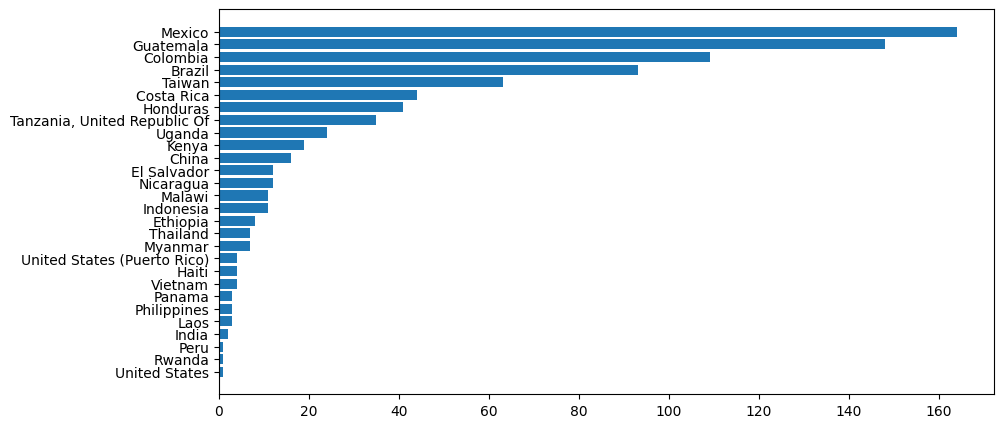

In [104]:
countries = df["country_of_origin"].value_counts().sort_values()
plt.figure(figsize=(10, 5))
plt.barh(countries.index, countries.values)

In [105]:
quality_features = ["aroma", "flavor", "aftertaste", "acidity",
       "body", "balance", "uniformity", "clean_cup", "sweetness",
       "cupper_points", "total_cup_points"]

df[quality_features].describe().T

,count,mean,std,min,25%,50%,75%,max
aroma,850.0,7.568341,0.293657,5.08,7.42,7.58,7.75,8.75
flavor,850.0,7.514706,0.305015,6.17,7.33,7.50,7.67,8.67
aftertaste,850.0,7.388094,0.314400,6.17,7.25,7.42,7.58,8.50
acidity,850.0,7.526741,0.294085,5.25,7.33,7.50,7.67,8.58
body,850.0,7.500929,0.259346,6.33,7.33,7.50,7.67,8.42
balance,850.0,7.499753,0.326582,6.08,7.33,7.50,7.67,8.58
uniformity,850.0,9.876694,0.434173,6.00,10.00,10.00,10.00,10.00
clean_cup,850.0,9.859518,0.703486,1.33,10.00,10.00,10.00,10.00
sweetness,850.0,9.928435,0.448235,1.33,10.00,10.00,10.00,10.00
cupper_points,850.0,7.470859,0.385499,5.17,7.25,7.50,7.67,8.58


<ipython-input-106-6ca66ae70b38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-106-6ca66ae70b38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].cat.codes
<ipython-input-106-6ca66ae70b38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

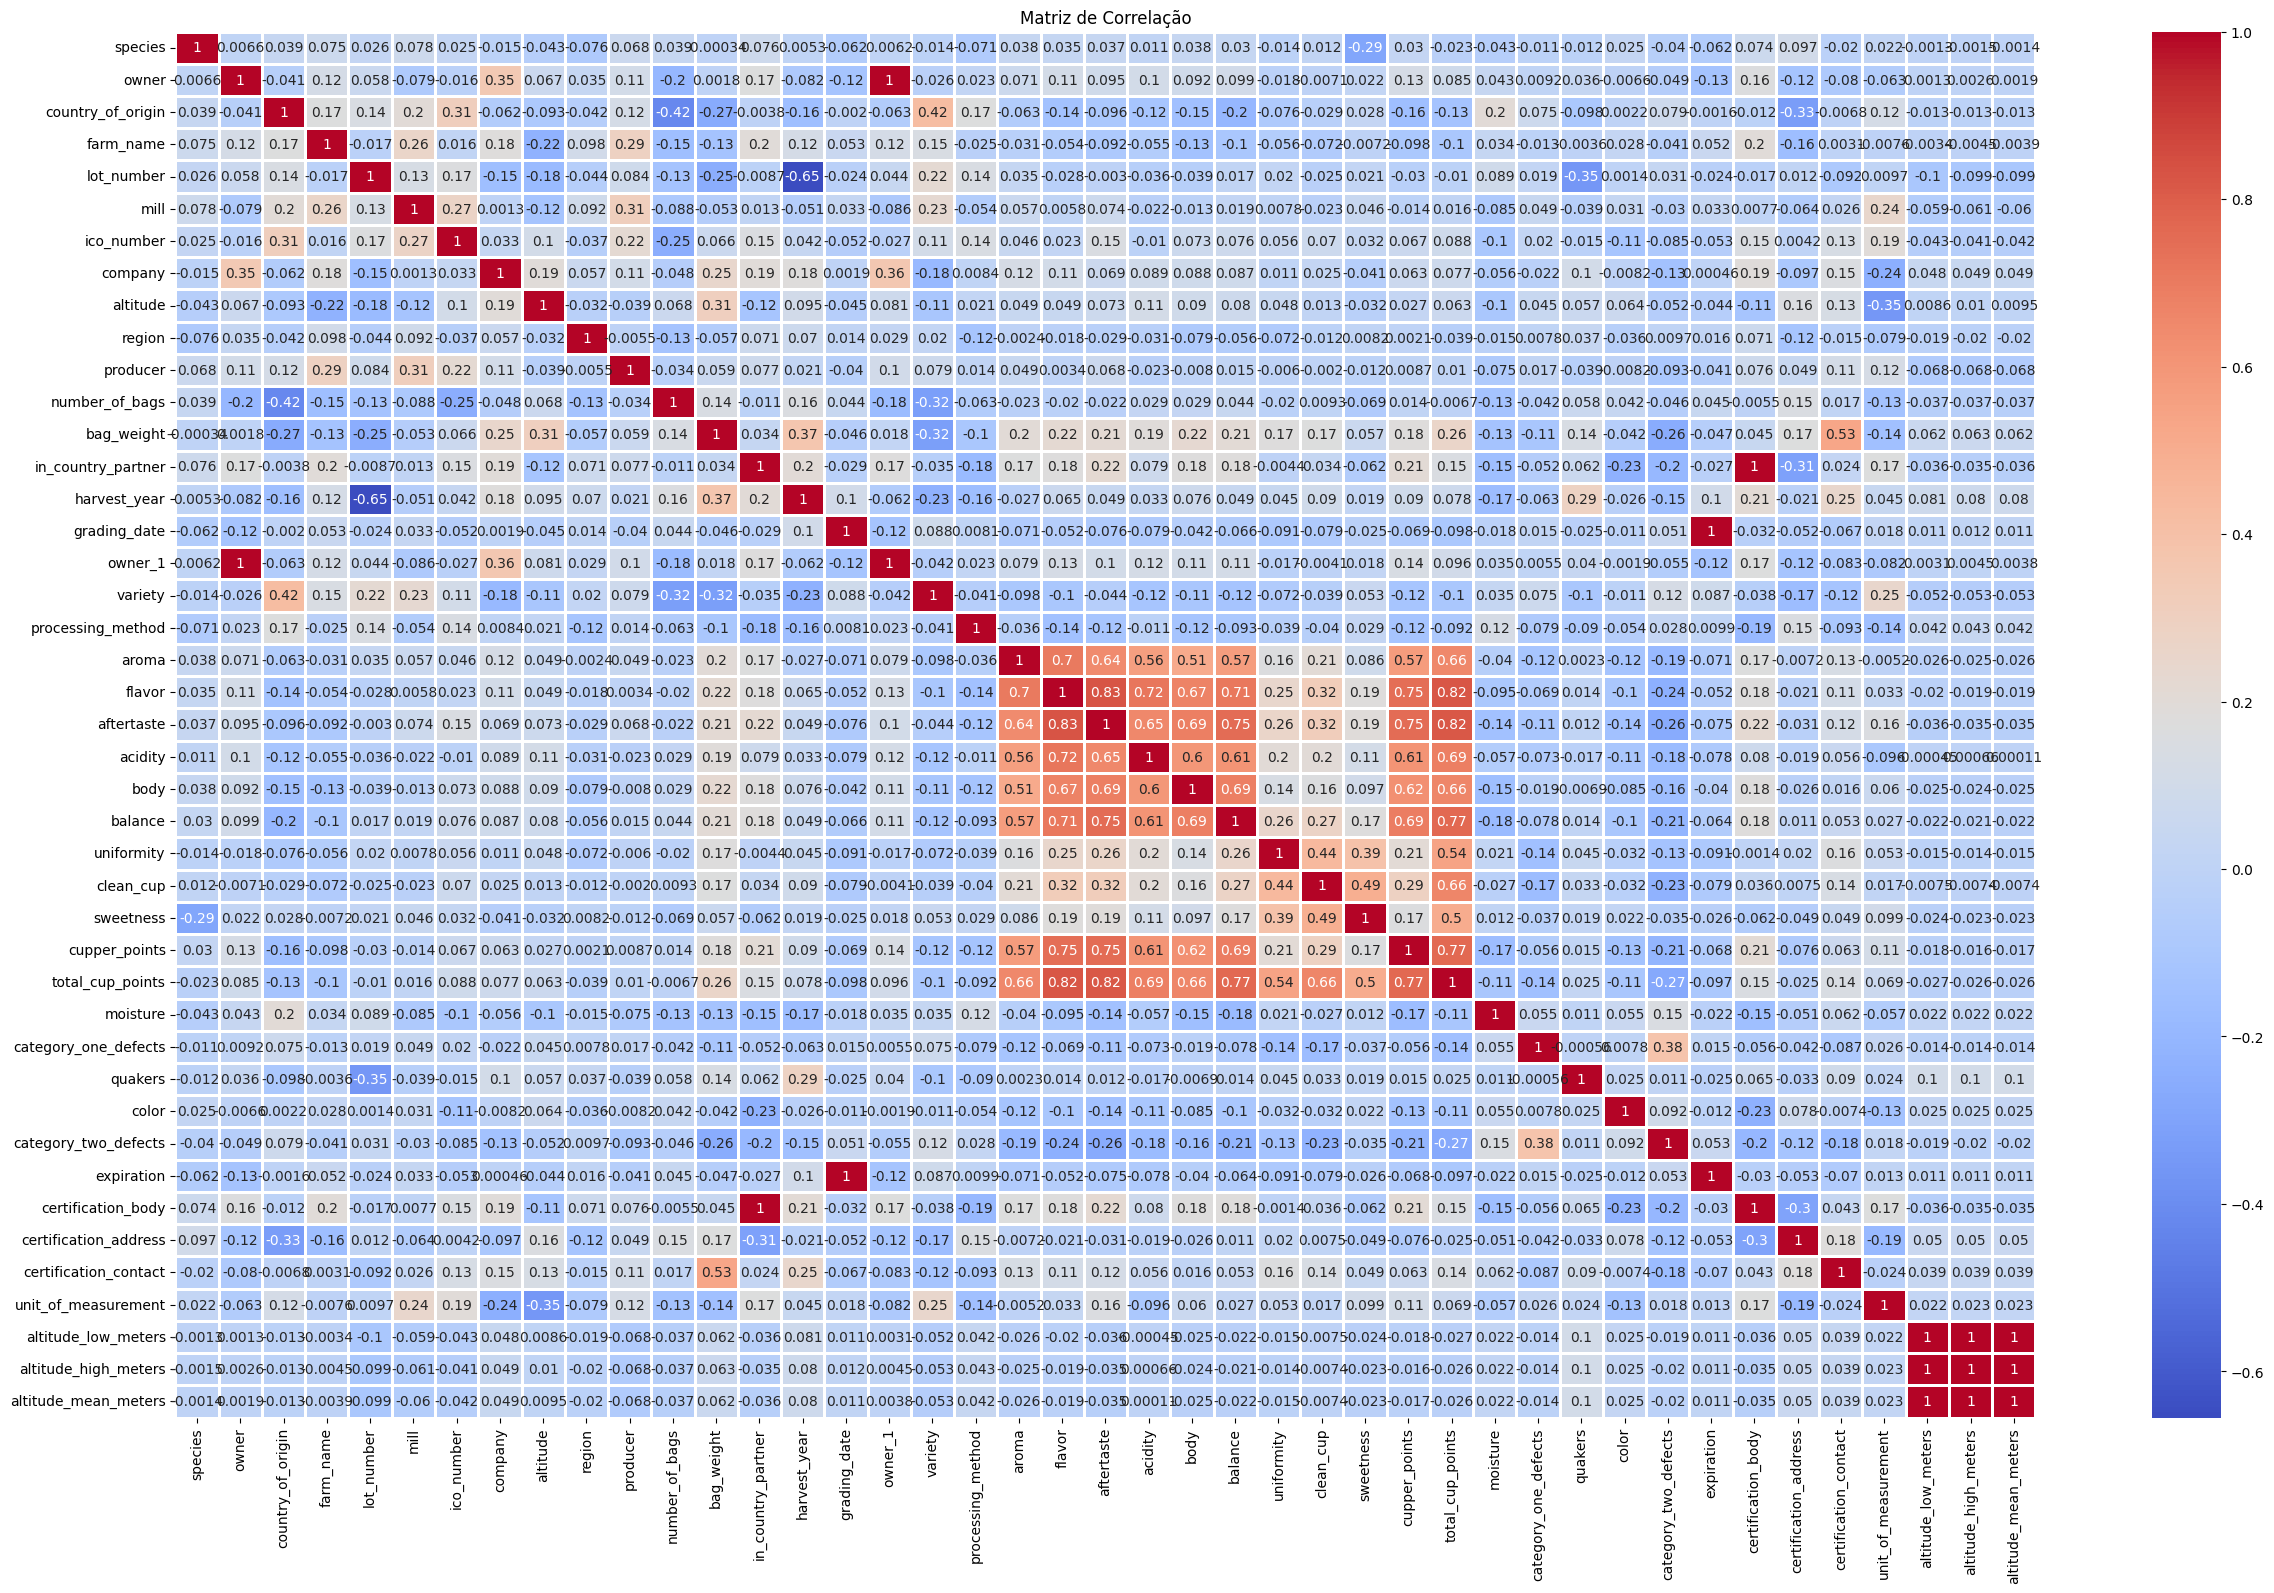

In [106]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

correlation_matrix = df.corr()

plt.figure(figsize=(30, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Matriz de Correlação')
plt.show()

In [107]:
# Encontrar e exibir correlações acima de 0.65
threshold = 0.65
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((colname1, colname2, corr_value))

if high_corr_pairs:
    print("Relações com correlação acima de 65%:\n")
    for pair in high_corr_pairs:
        print(f"{pair[0]} e {pair[1]}: {pair[2]:.2f}")

Relações com correlação acima de 65%:

harvest_year e lot_number: -0.65
owner_1 e owner: 1.00
flavor e aroma: 0.70
aftertaste e flavor: 0.83
acidity e flavor: 0.72
acidity e aftertaste: 0.65
body e flavor: 0.67
body e aftertaste: 0.69
balance e flavor: 0.71
balance e aftertaste: 0.75
balance e body: 0.69
cupper_points e flavor: 0.75
cupper_points e aftertaste: 0.75
cupper_points e balance: 0.69
total_cup_points e aroma: 0.66
total_cup_points e flavor: 0.82
total_cup_points e aftertaste: 0.82
total_cup_points e acidity: 0.69
total_cup_points e body: 0.66
total_cup_points e balance: 0.77
total_cup_points e clean_cup: 0.66
total_cup_points e cupper_points: 0.77
expiration e grading_date: 1.00
certification_body e in_country_partner: 1.00
altitude_high_meters e altitude_low_meters: 1.00
altitude_mean_meters e altitude_low_meters: 1.00
altitude_mean_meters e altitude_high_meters: 1.00


5.41% das amostras possuem mais 85 de cupping



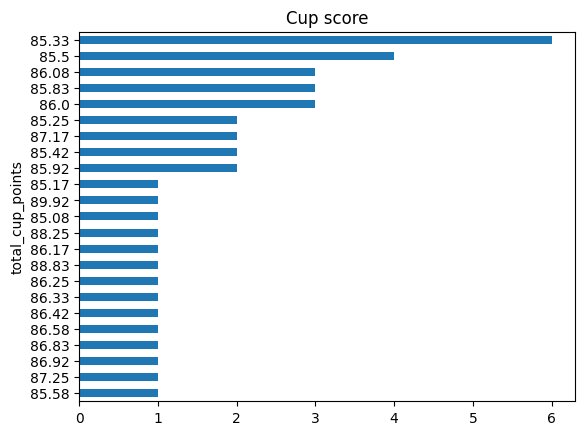

In [108]:
df[df["total_cup_points"] > 85]["total_cup_points"].value_counts().sort_values().plot(kind="barh", title='Cup score')
print(f"{(100 / len(df)) * len(df[df['total_cup_points'] >= 85]):.2f}% das amostras possuem mais 85 de cupping\n")

## Separação dos atributos

In [109]:
green_features = ["moisture", "category_one_defects", "quakers",
        "color", "category_two_defects"]

processing_features = ["species", "owner", "country_of_origin", "farm_name",
       "mill", "company", "altitude", "region", "producer",
       "number_of_bags", "bag_weight", "in_country_partner",
       "harvest_year", "grading_date", "owner_1", "variety",
       "processing_method"]

features = green_features + processing_features

def total_points_over_85(y):
    y = [1 if x > 85 else 0 for x in y]
    return y

def split_features_for_training(raw_data, features):
    np.random.seed(42)

    df_full_train, df_test = train_test_split(raw_data, test_size=0.25, random_state=1)
    df_train, df_val = train_test_split(df_full_train, test_size=0.30, random_state=1)

    print(
        f"length of training set: {len(df_train)}, validation set: {len(df_val)}, "
        f"test set: {len(df_test)}"
    )

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train["total_cup_points"].values
    y_val = df_val["total_cup_points"].values
    y_test = df_test["total_cup_points"].values

    df_train = df_train[features]
    df_val = df_val[features]
    df_test = df_test[features]

    return df_train, df_val, df_test, y_train, y_val, y_test, df_full_train

df_train, df_val, df_test, y_train, y_val, y_test, df_full_train = split_features_for_training(df, features)
df_full_train_aux = df_full_train
y_train = total_points_over_85(y_train)
y_val = total_points_over_85(y_val)
y_test = total_points_over_85(y_test)

length of training set: 445, validation set: 192, test set: 213


In [110]:
categorical_features = [
    "color",
    "species",
    "owner",
    "country_of_origin",
    "farm_name",
    "mill",
    "company",
    "region",
    "producer",
    "in_country_partner",
    "harvest_year",
    "owner_1",
    "variety",
    "processing_method"
]

def get_mutual_info(series):
    return mutual_info_score(series, df_full_train["total_cup_points"])

mi = df_full_train[categorical_features].apply(get_mutual_info)
mi.sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

producer              3.540395
farm_name             3.115154
mill                  2.898107
region                2.754278
company               2.491243
owner_1               2.472896
owner                 2.462046
country_of_origin     1.040062
in_country_partner    1.032665
variety               0.782162
harvest_year          0.654260
processing_method     0.231622
color                 0.160120
species               0.016499
dtype: float64

In [111]:
numerical_features = [
"moisture",
"category_one_defects",
"quakers",
"category_two_defects",
"altitude",
"number_of_bags",
"bag_weight"
]

descriptive_stats = df.describe().T

quartis = descriptive_stats[['25%', '50%', '75%']]

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=20)
kmeans.fit(scaled_df)
labels = kmeans.labels_
df['Cluster'] = labels

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-111-62a44d63fae9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = labels
<ipython-input-111-62a44d63fae9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA1'] = principal_components[:, 0]
<ipython-input-111-62a44d63fae9>:26: SettingWithCo

<ipython-input-112-3fc333b28dd5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_Label'] = df.apply(label_cluster, axis=1)


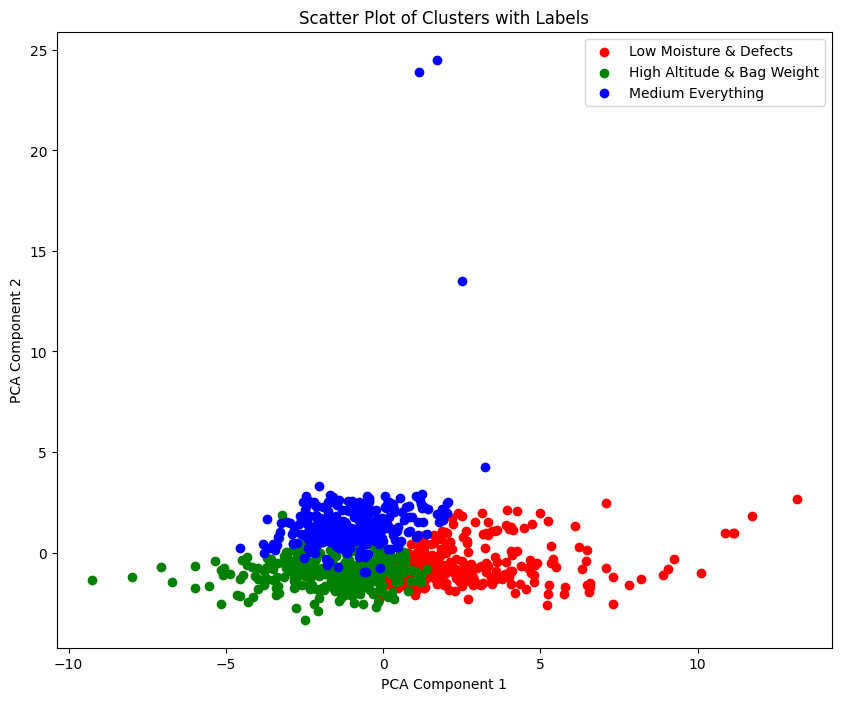

In [112]:
# Analisando as médias das variáveis numéricas para cada cluster
cluster_means = df.groupby('Cluster')[numerical_features].mean()

# Adicionando labels com base nas características dominantes
def label_cluster(row):
    if row['Cluster'] == 0:
        return 'Low Moisture & Defects'
    elif row['Cluster'] == 1:
        return 'High Altitude & Bag Weight'
    elif row['Cluster'] == 2:
        return 'Medium Everything'
    else:
        return 'Undefined'

df['Cluster_Label'] = df.apply(label_cluster, axis=1)

# Visualização com labels
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b']
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], c=colors[cluster], label=f'{label_cluster({"Cluster": cluster})}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of Clusters with Labels')
plt.legend()
plt.show()


In [113]:
df_cluster_1 = df[df['Cluster'] == 0.0]
df_cluster_2 = df[df['Cluster'] == 1.0]
df_cluster_3 = df[df['Cluster'] == 2.0]

In [114]:
df_cluster_1

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Cluster,PCA1,PCA2,Cluster_Label
238,0,8,14,236,134,4,286,0,101,189,...,15,1,1,1480.00,1480.00,1480.00,0,-0.318959,-0.885570,Low Moisture & Defects
331,0,124,14,134,134,317,240,0,20,237,...,15,1,1,1100.00,1100.00,1100.00,0,-0.135902,-2.370645,Low Moisture & Defects
369,0,84,14,224,134,110,315,0,76,222,...,15,1,1,1400.00,1400.00,1400.00,0,-0.336045,-1.408548,Low Moisture & Defects
403,0,109,14,102,134,128,1,46,20,228,...,15,1,1,1100.00,1100.00,1100.00,0,-0.291652,-0.902427,Low Moisture & Defects
429,0,35,14,383,134,243,314,103,61,37,...,15,1,1,1300.00,1300.00,1300.00,0,-0.005673,-1.094714,Low Moisture & Defects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,29,8,53,134,58,264,29,95,124,...,22,12,1,1450.00,1450.00,1450.00,0,11.146743,0.970583,Low Moisture & Defects
1305,0,29,8,53,134,58,264,29,95,124,...,22,12,1,1450.00,1450.00,1450.00,0,11.110083,0.947351,Low Moisture & Defects
1307,0,161,7,1,134,90,528,112,289,57,...,9,0,1,350.00,350.00,350.00,0,10.106114,-1.040032,Low Moisture & Defects
1308,0,69,16,152,12,26,70,89,20,93,...,22,12,1,1100.00,1100.00,1100.00,0,13.145094,2.656720,Low Moisture & Defects


In [115]:
df_cluster_2

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Cluster,PCA1,PCA2,Cluster_Label
1,0,155,5,279,134,216,309,134,171,80,...,6,4,1,1950.0,2200.0,2075.0,1,-9.252508,-1.358221,High Altitude & Bag Weight
4,0,155,5,279,134,216,309,134,171,80,...,6,4,1,1950.0,2200.0,2075.0,1,-7.982261,-1.214668,High Altitude & Bag Weight
9,0,52,5,377,134,307,308,74,154,202,...,6,4,1,1795.0,1850.0,1822.5,1,-6.717120,-1.468995,High Altitude & Bag Weight
18,0,226,1,83,144,119,528,206,92,245,...,16,24,1,1450.0,1450.0,1450.0,1,-7.062296,-0.708910,High Altitude & Bag Weight
21,0,211,3,348,134,59,465,189,65,184,...,9,0,1,1300.0,1300.0,1300.0,1,-5.993004,-1.777581,High Altitude & Bag Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,0,211,3,348,134,97,454,189,20,21,...,9,0,1,1100.0,1100.0,1100.0,1,-0.108522,-1.285440,High Altitude & Bag Weight
1259,0,9,18,310,134,1,417,190,264,178,...,9,0,1,900.0,1500.0,1200.0,1,1.400487,-0.831746,High Altitude & Bag Weight
1319,1,167,9,345,136,274,278,121,8,42,...,28,7,1,1000.0,1000.0,1000.0,1,-2.529724,-0.987468,High Altitude & Bag Weight
1322,1,167,9,346,135,274,277,121,8,42,...,28,7,1,1000.0,1000.0,1000.0,1,-1.783200,-0.960521,High Altitude & Bag Weight


In [116]:
df_cluster_3

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Cluster,PCA1,PCA2,Cluster_Label
54,0,70,2,3,134,300,406,91,158,85,...,25,10,1,1800.00,1800.000,1800.000,2,-4.536261,0.230483,Medium Everything
57,0,123,6,382,134,51,130,173,220,0,...,21,11,0,1524.00,1524.000,1524.000,2,-3.635506,0.233999,Medium Everything
58,0,123,6,141,134,48,113,196,216,155,...,21,11,0,1417.32,1417.320,1417.320,2,-3.820307,0.427148,Medium Everything
69,0,123,6,17,134,32,112,94,230,84,...,21,11,0,1706.88,1755.648,1731.264,2,-3.679538,1.689224,Medium Everything
76,0,66,6,95,134,122,237,83,153,84,...,26,22,1,1770.00,1770.000,1770.000,2,-3.362641,0.377833,Medium Everything
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,0,123,6,100,134,34,140,195,199,164,...,21,11,0,1219.20,1219.200,1219.200,2,1.893321,2.045776,Medium Everything
1184,0,123,6,251,46,34,165,195,196,187,...,21,11,0,1219.20,1219.200,1219.200,2,1.209556,2.402714,Medium Everything
1186,0,123,6,55,33,34,134,195,70,159,...,21,11,1,1320.00,1320.000,1320.000,2,3.226542,4.253007,Medium Everything
1192,0,123,6,253,55,34,174,195,143,181,...,21,11,1,1700.00,1700.000,1700.000,2,0.355071,1.998779,Medium Everything


## Preparação dos dados de teste e treino

In [117]:
def model_validation(df_val, y_val, dv, model):
    val_dicts = df_val.to_dict(orient="records")
    X_val = dv.transform(val_dicts)
    y_preds = model.predict(X_val)
    return y_preds

def model_eval(y_val, y_pred):
    accuracy = (y_pred == y_val).mean()
    auc = roc_auc_score(y_val, y_pred)
    rsme = mean_squared_error(y_val, y_pred, squared=False)

    return accuracy, auc, rsme

def display_evaluation(y_val, y_pred):
    accuracy, auc, rsme = model_eval(y_val, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Roc Auc: {auc:.2f}")
    print(f"Rsme: {rsme:.2f}")

def train_LR(df, y_train, c=1.0, max_iter=1000, random_state=42):
    dicts = df.to_dict(orient="records")

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(
        solver="liblinear", C=c, max_iter=max_iter, random_state=random_state
    )
    model.fit(X_train, y_train)

    return dv, model

def train_DT(df, y_train):
    train_dicts = df.to_dict(orient="records")

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    model = DecisionTreeClassifier(max_depth=3)
    model.fit(X_train, y_train)

    return dv, model

def train_RF(df, y_train):
    train_dicts = df.to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    model = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)
    model.fit(X_train, y_train)

    return dv, model

def ft_importance(
    features, df_train, y_train, df_val, y_val, feature_to_remove="", model_type="LR"
):
    if feature_to_remove:
        sub_features = np.array([x for x in features if x != feature_to_remove])
    else:
        sub_features = features

    if model_type == "LR":
        dv, model = train_LR(df_train[sub_features], y_train)
    if model_type == "DT":
        dv, model = train_DT(df_train[sub_features], y_train)
    if model_type == "RF":
        dv, model = train_RF(df_train[sub_features], y_train)
    if model_type == "NB":
        dv, model = train_NB(df_train[sub_features], y_train)


    y_pred = model_validation(df_val, y_val, dv, model)

    accuracy, auc, rsme = model_eval(y_val, y_pred)

    return (feature_to_remove, accuracy, auc, rsme)


def get_ft_importance(features, df_train, y_train, df_val, y_val, model_type="LR"):
    scores = []
    for feature in features:
        scores.append(
            ft_importance(
                features,
                df_train,
                y_train,
                df_val,
                y_val,
                feature,
                model_type=model_type,
            )
        )

    cols = [
        "feature_removed",
        "accuracy",
        "auc",
        "rsme",
    ]
    return pd.DataFrame(scores, columns=cols)

def train_NB(df, y_train):
    dicts = df.to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = BernoulliNB()
    model.fit(X_train, y_train)

    return dv, model

In [118]:
numerical_features = [
    "moisture",
    "category_one_defects",
    "quakers",
    "category_two_defects",
    "altitude_mean_meters",
    "bag_weight",
    "total_cup_points"
]

categorical_features = [
    "color",
    "species",
    "owner",
    "country_of_origin",
    "farm_name",
    "mill",
    "company",
    "region",
    "producer",
    "in_country_partner",
    "harvest_year",
    "owner_1",
    "variety",
    "processing_method"
]

features = numerical_features + categorical_features
df_train, df_val, df_test, y_train, y_val, y_test, df_full_train = split_features_for_training(df_aux, features)

y_train = total_points_over_85(y_train)
y_val = total_points_over_85(y_val)
y_test = total_points_over_85(y_test)

length of training set: 445, validation set: 192, test set: 213


## Treinamento dos modelo de machine learning

#### Regressão Logística(LR)

In [119]:
dv_lr, model_lr = train_LR(df_train, y_train)
y_pred_lr = model_validation(df_val, y_val, dv_lr, model_lr)

display_evaluation(y_val, y_pred_lr)

Accuracy: 0.94
Roc Auc: 0.49
Rsme: 0.24


In [120]:
scores_df = get_ft_importance(features, df_train, y_train, df_val, y_val, model_type="LR")
scores_df.sort_values(by=["accuracy", "auc", "rsme"], ascending=[0, 0, 1])

,feature_removed,accuracy,auc,rsme
20,processing_method,0.953125,0.500000,0.216506
0,moisture,0.942708,0.494536,0.239357
1,category_one_defects,0.942708,0.494536,0.239357
2,quakers,0.942708,0.494536,0.239357
3,category_two_defects,0.942708,0.494536,0.239357
4,altitude_mean_meters,0.942708,0.494536,0.239357
5,bag_weight,0.942708,0.494536,0.239357
6,total_cup_points,0.942708,0.494536,0.239357
7,color,0.942708,0.494536,0.239357
8,species,0.942708,0.494536,0.239357


In [121]:
removed_ft_LR = [
    "moisture",
    "category_one_defects",
    "quakers",
    "category_two_defects",
    "altitude_mean_meters",
    "bag_weight",
    "species",
    "owner",
    "country_of_origin",
    "farm_name",
    "mill",
    "company",
    "region",
    "producer",
    "in_country_partner",
    "harvest_year",
    "owner_1",
    "variety",
    "color"
]

## Árvore de Decisão(DT)

In [122]:
dv_dt, model_dt = train_DT(df_train, y_train)
y_pred_dt = model_validation(df_val, y_val, dv_dt, model_dt)

joblib.dump(dv_dt, 'dv_dt.joblib')
joblib.dump(model_dt, 'model_dt.joblib')

display_evaluation(y_val, y_pred_dt)

Accuracy: 1.00
Roc Auc: 1.00
Rsme: 0.00


In [123]:
scores_df = get_ft_importance(features, df_train, y_train, df_val, y_val, model_type="DT")
scores_df.sort_values(by=["accuracy", "auc", "rsme"], ascending=[0, 0, 1])

,feature_removed,accuracy,auc,rsme
0,moisture,1.000000,1.000000,0.000000
1,category_one_defects,1.000000,1.000000,0.000000
2,quakers,1.000000,1.000000,0.000000
3,category_two_defects,1.000000,1.000000,0.000000
4,altitude_mean_meters,1.000000,1.000000,0.000000
5,bag_weight,1.000000,1.000000,0.000000
7,color,1.000000,1.000000,0.000000
8,species,1.000000,1.000000,0.000000
9,owner,1.000000,1.000000,0.000000
10,country_of_origin,1.000000,1.000000,0.000000


In [124]:
removed_ft_DT = [
    "moisture",
    "category_one_defects",
    "quakers",
    "category_two_defects",
    "altitude_mean_meters",
    "bag_weight",
    "color",
    "species",
    "owner",
    "country_of_origin",
    "farm_name",
    "mill",
    "company",
    "region",
    "producer",
    "in_country_partner",
    "harvest_year",
    "owner_1",
    "variety",
    "processing_method"
]

## Floresta Aleatória(RF)

In [125]:
dv_rf, model_rf = train_RF(df_train, y_train)
y_pred_rf = model_validation(df_val, y_val, dv_dt, model_dt)

display_evaluation(y_val, y_pred_rf)

Accuracy: 1.00
Roc Auc: 1.00
Rsme: 0.00


In [126]:
scores_df = get_ft_importance(features, df_train, y_train, df_val, y_val, model_type="RF")
scores_df.sort_values(by=["accuracy", "auc", "rsme"], ascending=[0, 0, 1])

,feature_removed,accuracy,auc,rsme
10,country_of_origin,0.973958,0.722222,0.161374
12,mill,0.973958,0.722222,0.161374
5,bag_weight,0.968750,0.666667,0.176777
2,quakers,0.963542,0.611111,0.190941
15,producer,0.963542,0.611111,0.190941
18,owner_1,0.963542,0.611111,0.190941
3,category_two_defects,0.958333,0.555556,0.204124
7,color,0.958333,0.555556,0.204124
8,species,0.958333,0.555556,0.204124
13,company,0.958333,0.555556,0.204124


In [127]:
removed_ft_RF = [
        "moisture",
    "category_one_defects",
    "quakers",
    "category_two_defects",
    "altitude_mean_meters",
    "species",
    "owner",
    "country_of_origin",
    "company",
    "region",
    "in_country_partner",
    "owner_1",
    "processing_method",
    "bag_weight",
    "color",
    "farm_name",
    "mill",
    "producer",
    "harvest_year",
    "variety"
]

#### Teste para verificar o resultado da treinamento com os elementos removidos

In [128]:
dv_lr2, model_lr2 = train_DT(df_train[removed_ft_DT], y_train)
y_pred_lr2 = model_validation(df_val, y_val, dv_lr2, model_lr2)

display_evaluation(y_val, y_pred_lr2)

Accuracy: 0.95
Roc Auc: 0.50
Rsme: 0.22


In [129]:
dv_lr2, model_lr2 = train_DT(df_train[removed_ft_RF], y_train)
y_pred_lr2 = model_validation(df_val, y_val, dv_lr2, model_lr2)

display_evaluation(y_val, y_pred_lr2)

Accuracy: 0.95
Roc Auc: 0.50
Rsme: 0.22


In [130]:
dv_lr2, model_lr2 = train_DT(df_train[removed_ft_RF], y_train)
y_pred_lr2 = model_validation(df_val, y_val, dv_lr2, model_lr2)

display_evaluation(y_val, y_pred_lr2)

Accuracy: 0.95
Roc Auc: 0.50
Rsme: 0.23


## Bernoulli Naive Bayes(NB)

In [131]:
dv_nb, model_nb = train_NB(df_train, y_train)
y_pred_nb = model_validation(df_val, y_val, dv_nb, model_nb)

display_evaluation(y_val, y_pred_nb)

Accuracy: 0.95
Roc Auc: 0.50
Rsme: 0.22


In [132]:
scores_df = get_ft_importance(features, df_train, y_train, df_val, y_val, model_type="NB")
scores_df.sort_values(by=["accuracy", "auc", "rsme"], ascending=[0, 0, 1])

,feature_removed,accuracy,auc,rsme
0,moisture,0.953125,0.5,0.216506
1,category_one_defects,0.953125,0.5,0.216506
2,quakers,0.953125,0.5,0.216506
3,category_two_defects,0.953125,0.5,0.216506
4,altitude_mean_meters,0.953125,0.5,0.216506
5,bag_weight,0.953125,0.5,0.216506
6,total_cup_points,0.953125,0.5,0.216506
7,color,0.953125,0.5,0.216506
8,species,0.953125,0.5,0.216506
9,owner,0.953125,0.5,0.216506


In [133]:
removed_ft_NB  = [
    "moisture",
    "category_one_defects",
    "quakers",
    "category_two_defects",
    "altitude_mean_meters",
    "bag_weight",
    "color",
    "species",
    "owner",
    "country_of_origin",
    "farm_name",
    "mill",
    "company",
    "region",
    "producer",
    "in_country_partner",
    "harvest_year",
    "owner_1",
    "variety",
    "processing_method"
]

## Parameter Tuning

In [134]:
values = []

dv_lr, model_lr = train_LR(df_train, y_train)

for random_state in [2, 10, 32, 42]:
    for c in [0.01, 0.1, 1, 10]:
        for no_iter in [100, 500, 1000, 10000]:
            dv_lr, model_lr = train_LR(df_train, y_train, c=c, max_iter=no_iter, random_state=random_state)

            y_pred_lr = model_validation(df_val, y_val, dv_lr, model_lr)

            values.append((random_state, c, no_iter, *model_eval(y_val, y_pred_lr)))

cols = ["random_state", "c_value", "max_iter", "accuracy", "auc", "rsme"]

parameter_tuning_scores_df = pd.DataFrame(values, columns=cols)
parameter_tuning_scores_df.sort_values(by=["accuracy", "auc", "rsme"], ascending=[0, 0, 1])

,random_state,c_value,max_iter,accuracy,auc,rsme
0,2,0.01,100,0.953125,0.500000,0.216506
1,2,0.01,500,0.953125,0.500000,0.216506
2,2,0.01,1000,0.953125,0.500000,0.216506
3,2,0.01,10000,0.953125,0.500000,0.216506
4,2,0.10,100,0.953125,0.500000,0.216506
...,...,...,...,...,...,...
47,32,10.00,10000,0.932292,0.489071,0.260208
60,42,10.00,100,0.932292,0.489071,0.260208
61,42,10.00,500,0.932292,0.489071,0.260208
62,42,10.00,1000,0.932292,0.489071,0.260208


## Teste prático do modelo

In [135]:
sample = df_train.copy()

sample['coffee_quality'] = sample['total_cup_points'].apply(lambda x: 'bom' if x >= 85 else 'indesejado')

df_accepted_coffee = sample[sample['coffee_quality'] == 'bom']
df_rejected_coffee = sample[sample['coffee_quality'] == 'indesejado']

In [136]:
display(df_accepted_coffee)

,moisture,category_one_defects,quakers,category_two_defects,altitude_mean_meters,bag_weight,total_cup_points,color,species,owner,...,mill,company,region,producer,in_country_partner,harvest_year,owner_1,variety,processing_method,coffee_quality
5,0.00,1,0.0,0,1800.0,70,85.92,Blue-Green,Arabica,exportadora de cafe condor s.a,...,trilladora boananza,exportadora de cafe condor s.a,huila,N/A,Almacafé,2013,Exportadora de Cafe Condor S.A,Caturra,Washed / Wet,bom
14,0.11,0,0.0,2,1754.0,60,86.08,Bluish-Green,Arabica,jungle estate,...,nkg coffee mills,keremara limited,nyeri,JUNGLE ESTATE,Kenya Coffee Traders Association,2014,Jungle Estate,SL28,Natural / Dry,bom
17,0.11,0,0.0,8,2136.0,70,85.08,Green,Arabica,carcafe ltda ci,...,N/A,carcafe ltda,cundinamarca,ORLANDO ORTIZ /WILSON ORTIZ/GILBERTO ACOSTA,Almacafé,2012,CARCAFE LTDA CI,Caturra,Natural / Dry,bom
33,0.08,0,1.0,0,1600.0,60,85.83,Bluish-Green,Arabica,gonzalo hernandez,...,beneficio casa ruiz s.a.,ce specialty s.a.,boquete,Plinio Ruiz,Specialty Coffee Association of Costa Rica,2017,Gonzalo Hernandez,Gesha,Washed / Wet,bom
34,0.10,0,0.0,3,1500.0,2,85.58,Blue-Green,Arabica,atlantic specialty coffee,...,j. hill y cia,atlantic specialty coffee,apaneca,Aida Batlle,Specialty Coffee Association,2013,Atlantic Specialty Coffee,Bourbon,Washed / Wet,bom
36,0.09,0,0.0,3,1300.0,30,85.00,Green,Arabica,"el equimite, cafetal biodinámico",...,"cafetal el equimite, rancho agroecológico","cafetal el equimite, rancho agroecológico, s.p...",veracruz,Varios productores minifundistas,Centro Agroecológico del Café A.C.,2015,"El Equimite, Cafetal Biodinámico",Typica,Washed / Wet,bom
40,0.13,0,0.0,0,1320.0,1,87.17,Green,Arabica,roberto licona franco,...,la herradura,N/A,xalapa,ROBERTO LICONA FRANCO,AMECAFE,2012,ROBERTO LICONA FRANCO,Other,Washed / Wet,bom
41,0.11,0,0.0,3,1325.0,60,85.17,Green,Arabica,"nomura trading co., ltd.",...,N/A,"nomura trading co., ltd.",lintong,N/A,Specialty Coffee Association,2012,"Nomura Trading Co., Ltd.",Sumatra Lintong,Semi-washed / Semi-pulped,bom
43,0.12,0,0.0,0,1000.0,15,86.08,Green,Arabica,"lin, che-hao krude 林哲豪",...,sunshine valley estate 向陽高山咖啡,taiwan coffee laboratory,natou county,LIN YEN CHIEN 林言謙,Specialty Coffee Association,2015,"Lin, Che-Hao Krude 林哲豪",Bourbon,Semi-washed / Semi-pulped,bom
65,0.12,0,0.0,5,1950.0,60,85.42,Green,Arabica,great lakes coffee uganda,...,great lakes coffee,great lakes coffee,kapchorwa,Chesiyo Farmer group,Uganda Coffee Development Authority,2013,Great Lakes Coffee Uganda,SL14,Washed / Wet,bom


In [137]:
display(df_rejected_coffee)

,moisture,category_one_defects,quakers,category_two_defects,altitude_mean_meters,bag_weight,total_cup_points,color,species,owner,...,mill,company,region,producer,in_country_partner,harvest_year,owner_1,variety,processing_method,coffee_quality
0,0.10,0,0.0,28,1200.0,2,78.00,Green,Arabica,samuel eli gurel,...,hani,greenhouse coffee china,yunnan,GreenHouse Coffee,Specialty Coffee Association,2013,Samuel Eli Gurel,Typica,Washed / Wet,indesejado
1,0.00,0,0.0,2,4001.0,2,81.83,Green,Arabica,u mg mg,...,N/A,N/A,ywar ngan,U Mg Mg,Coffee Quality Institute,2015,U Mg Mg,Catuai,Washed / Wet,indesejado
2,0.11,0,0.0,1,1500.0,70,82.92,Green,Arabica,racafe & cia s.c.a,...,bogota,racafe & cia s.c.a,guayata,N/A,Almacafé,2017,Racafe & Cia S.C.A,Caturra,Washed / Wet,indesejado
3,0.10,0,0.0,2,1218.0,1,83.83,Green,Arabica,filemon mendoza campos,...,colonia baltazar r.leyva mancilla,N/A,petatlan,FILEMON MENDOZA CAMPOS,AMECAFE,2012,FILEMON MENDOZA CAMPOS,Bourbon,Natural / Dry,indesejado
4,0.11,0,0.0,0,600.0,30,82.33,Green,Arabica,cqi taiwan icp cqi台灣合作夥伴,...,yu jin gui 玉金櫃咖啡,blossom valley宸嶧國際,taichung xinshe 台中市新社區,Lin yu ding 林玉定,Blossom Valley International,2013/2014,CQI Taiwan ICP CQI台灣合作夥伴,Typica,Washed / Wet,indesejado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,0.10,0,0.0,1,1200.0,1,82.17,Green,Arabica,organizaciones de productores de cafe colimense,...,beneficio productores organicos de cnoas s.p.r...,organizaciones de productores de cafe colimens...,colima,"OSCAR TORRES OCHOCA, GENARO MATA CAMBEROS, MAN...",AMECAFE,2012,ORGANIZACIONES DE PRODUCTORES DE CAFE COLIMENSE,Typica,Washed / Wet,indesejado
441,0.10,0,0.0,1,1500.0,69,83.25,Green,Arabica,juan luis alvarado romero,...,beneficio siembras vision (154),"siembras vision, s.a.",antigua,"SIEMBRAS VISIÓN, S.A.",Asociacion Nacional Del Café,2014,Juan Luis Alvarado Romero,Caturra,Washed / Wet,indesejado
442,0.09,0,0.0,2,1700.0,24.9,81.25,Bluish-Green,Arabica,essencecoffee,...,el injerto s.a.,essence coffee,huehuetenango,El Injerto S.A.,Blossom Valley International,2014,EssenceCoffee,Pacamara,Washed / Wet,indesejado
443,0.12,0,0.0,3,1550.0,70,83.92,Green,Arabica,compañia colombiana agroindustrial s.a,...,trilladora boananza,ecom cca sa,santander,N/A,Almacafé,2014,Compañia Colombiana Agroindustrial S.A,Caturra,Natural / Dry,indesejado


In [138]:
features = ["moisture", "category_one_defects", "quakers", "category_two_defects",
            "altitude_mean_meters", "bag_weight", "color", "species", "owner", "country_of_origin", "total_cup_points"]

X_train = df_train[features]
y_train = df_train["total_cup_points"]

test_data = {
    "moisture": [10.2],
    "category_one_defects": [2],
    "quakers": [0],
    "category_two_defects": [1],
    "altitude_mean_meters": [1200],
    "bag_weight": [30],
    "color": ["Green"],
    "species": ["Arabica"],
    "owner": ["John Doe"],
    "country_of_origin": ["Brazil"],
    "total_cup_points": [40]
}

colors = ["Green", "Blue", "Red", "Yellow", "Black", "Blue-Green", "Green-Blue", "Brown", "Gray"]
species = ["Arabica", "Robusta"]
owners = ["John Doe", "Jane Doe", "Alice Smith", "Bob Johnson", "João Silva", "Lucas Prado", "Carimbo Miguel", "Cristiano Lee", "Abel Motta"]
countries = ["Brazil", "Vietnam", "Ethiopia", "Colombia", "Russia", "China", "USA", "Venezuela", "Equador"]

for _ in range(1000):
    test_data["moisture"].append(uniform(0.1, 11.5))
    test_data["category_one_defects"].append(randint(0, 5))
    test_data["quakers"].append(randint(0, 2))
    test_data["category_two_defects"].append(randint(0, 3))
    test_data["altitude_mean_meters"].append(randint(100, 2000))
    test_data["bag_weight"].append(randint(25, 400))
    test_data["color"].append(choice(colors))
    test_data["species"].append(choice(species))
    test_data["owner"].append(choice(owners))
    test_data["country_of_origin"].append(choice(countries))
    test_data["total_cup_points"].append(uniform(10.0, 99.9))

df_test = pd.DataFrame(test_data)

X_test = df_test[features]

X_test_encoded = dv_dt.transform(X_test.to_dict(orient="records"))

predictions = model_dt.predict(X_test_encoded)

df_test["predicted_total_cup_points"] = predictions

df_test['predicted_total_cup_points']

df_accepted_coffee = df_test[df_test['predicted_total_cup_points'] == 1]
df_rejected_coffee = df_test[df_test['predicted_total_cup_points'] == 0]

In [139]:
df_accepted_coffee

,moisture,category_one_defects,quakers,category_two_defects,altitude_mean_meters,bag_weight,color,species,owner,country_of_origin,total_cup_points,predicted_total_cup_points
2,8.188945,2,2,2,752,63,Green,Arabica,Lucas Prado,Brazil,88.057275,1
5,5.115796,1,1,3,1309,60,Green,Arabica,João Silva,China,94.234931,1
15,7.500254,1,2,3,1932,241,Green,Arabica,Alice Smith,Colombia,90.306922,1
41,9.953149,4,0,3,848,300,Blue,Robusta,Alice Smith,Equador,90.376200,1
52,2.750767,0,2,3,1610,220,Green-Blue,Robusta,Cristiano Lee,Ethiopia,89.433192,1
...,...,...,...,...,...,...,...,...,...,...,...,...
980,3.528452,5,2,3,1942,186,Red,Robusta,Carimbo Miguel,Colombia,98.848471,1
981,8.793371,0,1,1,814,348,Black,Robusta,John Doe,Equador,93.431671,1
985,8.401873,3,2,2,708,255,Black,Robusta,João Silva,Equador,90.416067,1
990,1.026785,5,0,0,1939,211,Gray,Robusta,Jane Doe,Vietnam,93.992323,1


In [140]:
df_rejected_coffee

,moisture,category_one_defects,quakers,category_two_defects,altitude_mean_meters,bag_weight,color,species,owner,country_of_origin,total_cup_points,predicted_total_cup_points
0,10.200000,2,0,1,1200,30,Green,Arabica,John Doe,Brazil,40.000000,0
1,4.944455,5,0,0,615,93,Yellow,Arabica,Lucas Prado,Venezuela,42.545473,0
3,10.857133,5,1,3,301,385,Blue-Green,Robusta,Carimbo Miguel,USA,63.328927,0
4,5.773631,0,1,3,1351,136,Yellow,Robusta,Bob Johnson,Vietnam,74.232314,0
6,6.979889,5,1,1,1722,41,Red,Robusta,Carimbo Miguel,Vietnam,59.180773,0
...,...,...,...,...,...,...,...,...,...,...,...,...
996,11.217050,0,1,1,446,377,Green-Blue,Arabica,João Silva,USA,14.505712,0
997,10.395701,2,0,2,337,363,Green-Blue,Robusta,Carimbo Miguel,Vietnam,57.427731,0
998,3.011433,4,1,2,1858,236,Red,Robusta,Carimbo Miguel,Brazil,40.218807,0
999,10.911905,2,2,1,1691,327,Yellow,Arabica,John Doe,Colombia,56.260633,0


## Convertendo modelo para arquivo e aplicando o mesmo teste

In [141]:
dv_dt_loaded = joblib.load('dv_dt.joblib')
model_dt_loaded = joblib.load('model_dt.joblib')

test_dicts = df_test.to_dict(orient="records")
X_test = dv_dt_loaded.transform(test_dicts)
y_pred_dt_loaded = model_dt_loaded.predict(X_test)

df_test['predicted_quality'] = ['bom' if pred == 1 else 'indesejado' for pred in y_pred_dt_loaded]

df_test

,moisture,category_one_defects,quakers,category_two_defects,altitude_mean_meters,bag_weight,color,species,owner,country_of_origin,total_cup_points,predicted_total_cup_points,predicted_quality
0,10.200000,2,0,1,1200,30,Green,Arabica,John Doe,Brazil,40.000000,0,indesejado
1,4.944455,5,0,0,615,93,Yellow,Arabica,Lucas Prado,Venezuela,42.545473,0,indesejado
2,8.188945,2,2,2,752,63,Green,Arabica,Lucas Prado,Brazil,88.057275,1,bom
3,10.857133,5,1,3,301,385,Blue-Green,Robusta,Carimbo Miguel,USA,63.328927,0,indesejado
4,5.773631,0,1,3,1351,136,Yellow,Robusta,Bob Johnson,Vietnam,74.232314,0,indesejado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,11.217050,0,1,1,446,377,Green-Blue,Arabica,João Silva,USA,14.505712,0,indesejado
997,10.395701,2,0,2,337,363,Green-Blue,Robusta,Carimbo Miguel,Vietnam,57.427731,0,indesejado
998,3.011433,4,1,2,1858,236,Red,Robusta,Carimbo Miguel,Brazil,40.218807,0,indesejado
999,10.911905,2,2,1,1691,327,Yellow,Arabica,John Doe,Colombia,56.260633,0,indesejado


## Testando o modelo no dataset inicial

- para fins de curiosidade

In [142]:
dv_dt_loaded = joblib.load('dv_dt.joblib')
model_dt_loaded = joblib.load('model_dt.joblib')

test_dicts = df_train.to_dict(orient="records")
X_test = dv_dt_loaded.transform(test_dicts)
y_pred_dt_loaded = model_dt_loaded.predict(X_test)

df_train['predicted_quality'] = ['bom' if pred == 1 else 'indesejado' for pred in y_pred_dt_loaded]

df_accepted_coffee = df_train[df_train['predicted_quality'] == 'bom']

df_accepted_coffee[df_accepted_coffee['country_of_origin'] == 'Brazil']

,moisture,category_one_defects,quakers,category_two_defects,altitude_mean_meters,bag_weight,total_cup_points,color,species,owner,...,mill,company,region,producer,in_country_partner,harvest_year,owner_1,variety,processing_method,predicted_quality
109,0.11,0,0.0,1,1250.0,60,85.42,Blue-Green,Arabica,nucoffee,...,N/A,nucoffee,south of minas,José Vagner Ribeiro Junqueira,NUCOFFEE,2011,NUCOFFEE,Bourbon,Semi-washed / Semi-pulped,bom
440,0.12,0,0.0,2,1300.0,60,86.42,Green,Arabica,nucoffee,...,N/A,nucoffee,vale da grama,Homero Texeira de Macedo Junior,NUCOFFEE,2011,NUCOFFEE,Bourbon,Natural / Dry,bom
